In [27]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from plot_util import get_colormap
%matplotlib inline

In [4]:
cancer = pd.read_csv('data/wdbc.data', header=None)

In [6]:
cancer[:10]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


#### 연습

주어진 데이터에 대해 LR 모델로 다음을 수행해 봅시다.

1. 스케일링을 수행하고 모델 평가
1. PCA를 적용하고 모델 평가

In [10]:
X = cancer.loc[:, 2:].values

In [12]:
cancer[1].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [13]:
y = cancer[1].values

In [7]:
scaler = StandardScaler()

In [14]:
Xstd = scaler.fit_transform(X)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca2 = PCA(n_components=2)

In [33]:
Xpca2 = pca2.fit_transform(Xstd)

In [30]:
pca3 = PCA(n_components=3)

In [31]:
Xpca3 = pca3.fit_transform(Xstd)

In [34]:
X_tr, X_te, Xpca2_tr, Xpca2_te, Xpca3_tr, Xpca3_te, y_tr, y_te = train_test_split(
    Xstd, Xpca2, Xpca3, y, test_size=0.3)

In [35]:
model = LogisticRegression(C=1.0)

In [36]:
X.shape

(569, 30)

In [37]:
model.fit(X_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
model.score(X_te, y_te)

0.98245614035087714

In [39]:
model.score(X_tr, y_tr)

0.98492462311557794

In [40]:
model.fit(Xpca2_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
model.score(Xpca2_te, y_te)

0.96491228070175439

In [42]:
model.score(Xpca2_tr, y_tr)

0.94974874371859297

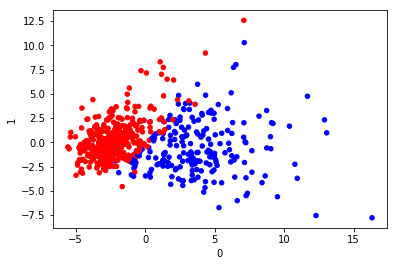

In [43]:
c = get_colormap(y, colors='rb')
DataFrame(Xpca2).plot(kind='scatter', x=0, y=1, c=c)

In [44]:
model.fit(Xpca3_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
model.score(Xpca3_te, y_te)

0.97660818713450293

In [46]:
model.score(Xpca3_tr, y_tr)

0.94221105527638194

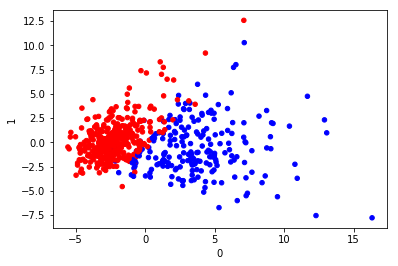

In [48]:
DataFrame(Xpca3).plot(kind='scatter', x=0, y=1, c=c)

In [49]:
from sklearn.pipeline import Pipeline

In [50]:
pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=1.))
])

In [51]:
pipe_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('model', LogisticRegression(C=1.))
])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [53]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [54]:
pipe1.score(X_test, y_test)

0.98830409356725146

In [55]:
pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [56]:
pipe_pca.score(X_test, y_test)

0.95906432748538006

In [57]:
from sklearn.model_selection import learning_curve

In [58]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipe1,
    X=X_train, y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5
)

In [66]:
train_results = DataFrame(train_scores, index=train_sizes).mean(1)

In [73]:
train_results.name = 'train'

In [74]:
train_results

31     0.974194
63     0.984127
95     0.989474
126    0.987302
158    0.989873
190    0.991579
221    0.985520
253    0.987352
285    0.986667
317    0.986751
Name: train, dtype: float64

In [70]:
val_results = DataFrame(val_scores, index=train_sizes).mean(1)

In [75]:
val_results.name = 'validation'

In [77]:
learn_results = pd.concat([train_results, val_results], axis=1)

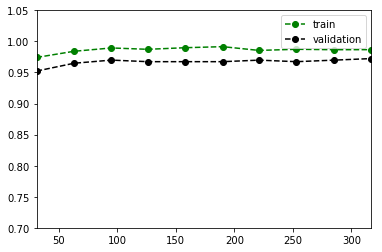

In [79]:
learn_results.plot(style=['go--', 'ko--'], ylim=(0.7, 1.05))

In [80]:
from sklearn.model_selection import validation_curve

In [81]:
params = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [82]:
train_scores, val_scores = validation_curve(
    estimator=pipe1,
    X=X_train, y=y_train,
    param_name='model__C', param_range=params,
    cv=10
)

In [85]:
train_results = DataFrame(train_scores, index=params).mean(1)
train_results.name = 'train'

In [87]:
val_results = DataFrame(val_scores, index=params).mean(1)
val_results.name = 'validation'

In [89]:
param_results = pd.concat([train_results, val_results], axis=1)

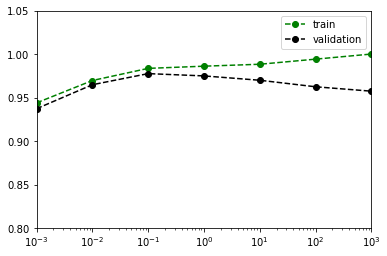

In [90]:
param_results.plot(
    logx=True, ylim=(0.8, 1.05), style=['go--', 'ko--'])

In [91]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = [
    {
        'pca__n_components': [None, 2, 3, 4, 5],
        'model__C': params,
        'model__penalty': ['l1', 'l2']
    }
]

In [102]:
gs = GridSearchCV(
    estimator=pipe_pca,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10
)

In [103]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'pca__n_components': [None, 2, 3, 4, 5], 'model__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'model__penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [104]:
gs.best_score_

0.97738693467336679

In [105]:
gs.best_params_

{'model__C': 0.1, 'model__penalty': 'l2', 'pca__n_components': None}

In [106]:
best_model = gs.best_estimator_

In [107]:
best_model.score(X_test, y_test)

0.98830409356725146

In [108]:
import pickle

In [110]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [111]:
del best_model

In [113]:
with open('best_model.pkl', 'rb') as file:
    my_model = pickle.load(file)

In [114]:
my_model.predict(X_test)

array(['M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

In [115]:
def make_logic_gate(w, b):
    def logic_gate(x1, x2):
        x = np.array([x1, x2])        
        z = np.dot(x, w)
        y = 1 if z > b else -1
        return 1 if y > 0 else 0
    return logic_gate

In [116]:
def test_logic(logic_gate):
    for x1, x2 in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        y = logic_gate(x1, x2)
        print(x1, x2, '|', y)

In [117]:
AND = make_logic_gate(w=np.array([0.5, 0.5]), b=0.7)

In [118]:
OR = make_logic_gate(w=np.array([0.5, 0.5]), b=0.2)

In [119]:
NAND = make_logic_gate(w=np.array([-0.5, -0.5]), b=-0.7)

In [120]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)

In [121]:
test_logic(XOR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 0


In [122]:
x = np.array([1.0, 0.5])

1층

In [123]:
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

In [125]:
z1 = np.dot(x, W1) + b1

In [126]:
z1

array([ 0.3,  0.7,  1.1])

In [127]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [128]:
x = np.arange(-5., 5., 0.1)

In [129]:
y = sigmoid(x)

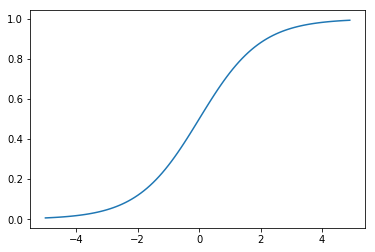

In [130]:
plt.plot(x, y)

In [131]:
a1 = sigmoid(z1)

In [132]:
a1

array([ 0.57444252,  0.66818777,  0.75026011])

In [133]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

In [134]:
z2 = np.dot(a1, W2) + b2

In [135]:
z2

array([ 0.51615984,  1.21402696])

In [136]:
a2 = sigmoid(z2)

In [137]:
a2

array([ 0.62624937,  0.7710107 ])

출력

In [138]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, .02])

In [139]:
z3 = np.dot(a2, W3) + b3

In [140]:
z3

array([ 0.31682708,  0.51627909])

In [143]:
sigmoid(z3)

array([ 0.57855079,  0.62627728])

In [144]:
def softmax(a):
    c = np.max(a)
    ea = np.exp(a-c)
    return ea / np.sum(ea)

In [145]:
softmax(z3)

array([ 0.45030164,  0.54969836])

In [146]:
softmax(z3).sum()

1.0

In [147]:
y = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [148]:
len(y)

10

In [149]:
y_pred1 = np.array([
    0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

In [150]:
len(y_pred1)

10

In [151]:
y_pred2 = np.array([
    0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

In [152]:
len(y_pred2)

10

In [153]:
def 평균제곱오차(y, y_pred):
    return np.sum((y-y_pred)**2).mean()

In [154]:
평균제곱오차(y, y_pred1)

0.19500000000000006

In [155]:
평균제곱오차(y, y_pred2)

1.1950000000000001

In [156]:
def cross_entropy_error(y, y_pred):
    delta = 1e-7
    return -np.sum(y*np.log(y_pred+delta))

In [157]:
cross_entropy_error(y, y_pred1)

0.51082545709933802

In [158]:
cross_entropy_error(y, y_pred2)

2.3025840929945458

In [159]:
import tensorflow as tf

In [160]:
from tensorflow.examples.tutorials.mnist import input_data

In [161]:
mnist = input_data.read_data_sets('mnist/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [171]:
x = mnist.train.images[0]

In [172]:
x.shape

(784,)

In [173]:
type(x)

numpy.ndarray

In [174]:
x = x.reshape(28, 28)

In [175]:
x.shape

(28, 28)

In [176]:
from scipy.misc import imsave

In [177]:
imsave('mnist sample.png', x)

In [179]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [180]:
x = tf.placeholder(tf.float32, [None, 784])

In [181]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [182]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [183]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [184]:
cross_entropy = tf.reduce_mean(
    -tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [185]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(
    cross_entropy)

In [186]:
sess = tf.InteractiveSession()

In [187]:
tf.global_variables_initializer().run()

In [189]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [190]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [191]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [192]:
print(sess.run(
    accuracy, feed_dict={
        x: mnist.test.images, y_: mnist.test.labels}))

0.9162
